### Import TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
#reshape inputs for CNN layers
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)

### Create the model (your code goes here)

In [5]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization(center = True, scale = False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

### Compile and train the model

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 265s 169ms/step - loss: 1.3977 - accuracy: 0.5134 - val_loss: 1.2300 - val_accuracy: 0.5661
Epoch 2/10
1563/1563 [==============================] - 265s 170ms/step - loss: 0.9093 - accuracy: 0.6847 - val_loss: 0.8812 - val_accuracy: 0.7003
Epoch 3/10
1563/1563 [==============================] - 266s 170ms/step - loss: 0.7465 - accuracy: 0.7404 - val_loss: 0.8548 - val_accuracy: 0.7055
Epoch 4/10
1563/1563 [==============================] - 325s 208ms/step - loss: 0.6369 - accuracy: 0.7801 - val_loss: 1.0464 - val_accuracy: 0.6579
Epoch 5/10
1563/1563 [==============================] - 387s 247ms/step - loss: 0.5627 - accuracy: 0.8055 - val_loss: 0.6020 - val_accuracy: 0.7932
Epoch 6/10
1563/1563 [==============================] - 377s 241ms/step - loss: 0.4920 - accuracy: 0.8314 - val_loss: 0.5283 - val_accuracy: 0.8215
Epoch 7/10
1563/1563 [==============================] - 291s 186ms/step - loss: 0.4354 - accuracy: 0.8483 - val_

### Evaluate the model

313/313 - 12s - loss: 0.5887 - accuracy: 0.8195


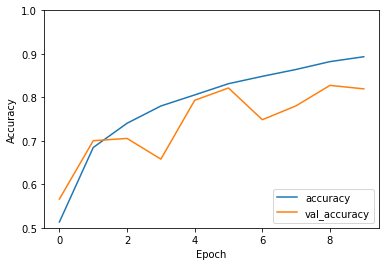

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [8]:
print(test_acc)

0.8195000290870667


## Comment:

I have increased the number of filters for every Conv2D layers from 32 to 256 and increased the varied the strides from (1, 1) to (3, 3) to improve the test dataset accuracy. Furthermore, I used the same method that I have followed in q1 to increase the test accuracy by adding dropout layers of 20% between every 2D MaxPooling and Dense layers, and adding batch normalization between every two 2D Convolutional layers and Dense layers.